# Import Libraries

In [ ]:
import numpy as np    # to handle arrays
import pandas as pd   # to load datasets
from statsmodels.formula.api import ols # to create linear models
import statsmodels.api as sm # also to create linear models

from matplotlib.pyplot import subplots # to create plots or figures
import matplotlib.pyplot as plt # to also creste plots or figures
import seaborn as sns # to create plots or figures

from sklearn.metrics import mean_squared_error # to get mean square error
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV # linear models
from sklearn.metrics import mean_squared_error # mean squared error
from sklearn.model_selection import train_test_split # train and test split

# Dataset

In [ ]:
# load dataset
df = pd.read_csv('laptop_prices.csv')
df.head() # print the first values of the dataset

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.shape[0] # number of samples

1275

In [ ]:
df.shape[1] # find number of columns

22

In [ ]:
# remove unwanted features
data = df.drop(['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen','IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model'], axis=1)
data.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


In [ ]:
# clean up NaN values
data.isnull().sum()

,0
Inches,0
Ram,0
Weight,0
Price_euros,4
ScreenW,0
ScreenH,0
CPU_freq,1
PrimaryStorage,0
SecondaryStorage,0


In [ ]:
#Drop and check for null values
data.dropna(inplace = True)
data.isnull().sum()

,0
Inches,0
Ram,0
Weight,0
Price_euros,0
ScreenW,0
ScreenH,0
CPU_freq,0
PrimaryStorage,0
SecondaryStorage,0


# Plot Dataset

In [ ]:
def analyze_column(data, column, target_column):
  """Analyze a single column against the target."""
  # Scatter plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=data, x=column, y=target_column)
  plt.title(f'{column} vs {target_column}')
  plt.xlabel(column)
  plt.ylabel(target_column)
  plt.show()

  # Correlation
  correlation = data[[column, target_column]].corr().iloc[0, 1]
  print(f'Correlation between {column} and {target_column}: {correlation}')

# function that plots all of the features c
def analyze_all_columns(data, target_column):
  """Analyze all columns against the target."""
  feature_columns = [col for col in data.columns if col != target_column]
  for column in feature_columns:
    analyze_column(data, column, target_column)

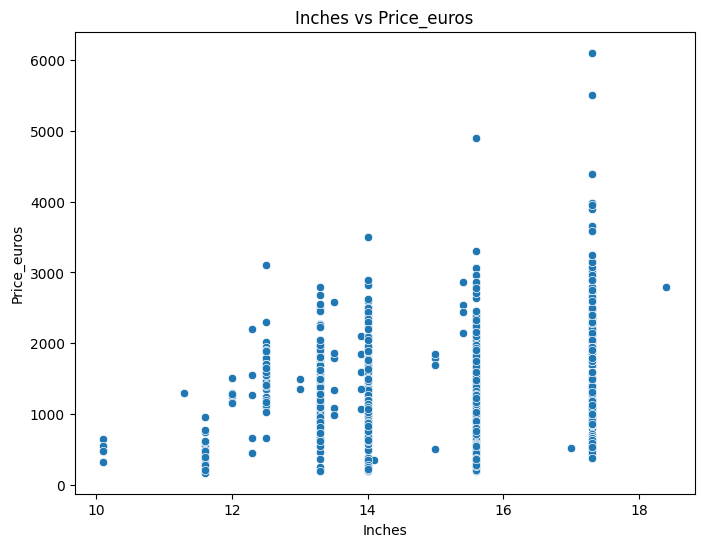

Correlation between Inches and Price_euros: 0.06745655162205809


In [ ]:
# relationship between price and inches
analyze_column(data, 'Inches', 'Price_euros')

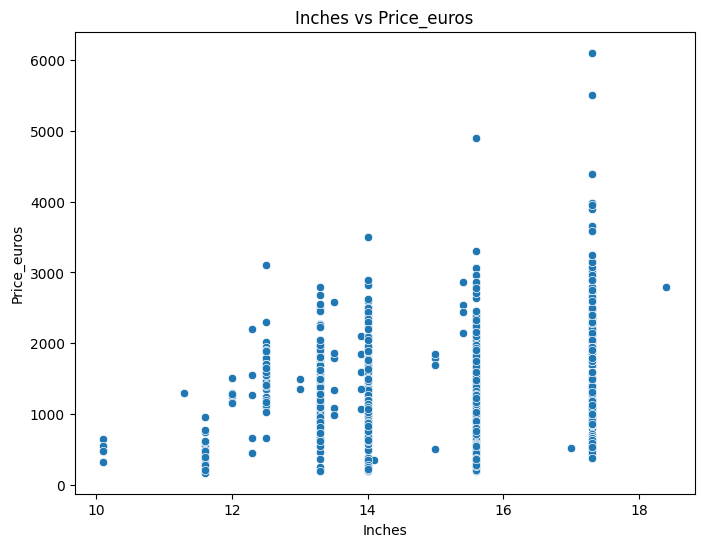

Correlation between Inches and Price_euros: 0.06745655162205809


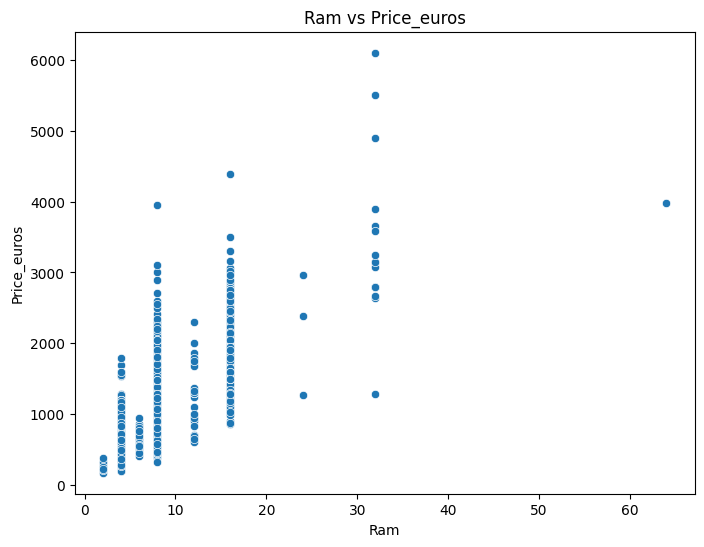

Correlation between Ram and Price_euros: 0.7411882734149476


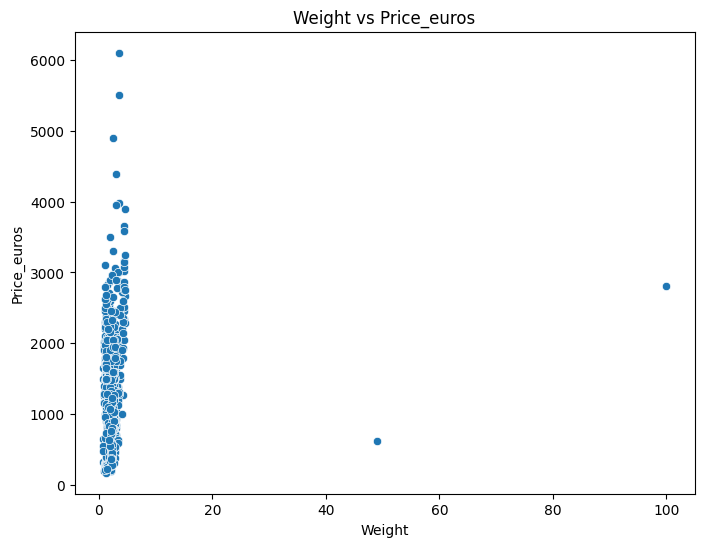

Correlation between Weight and Price_euros: 0.09520707603219605


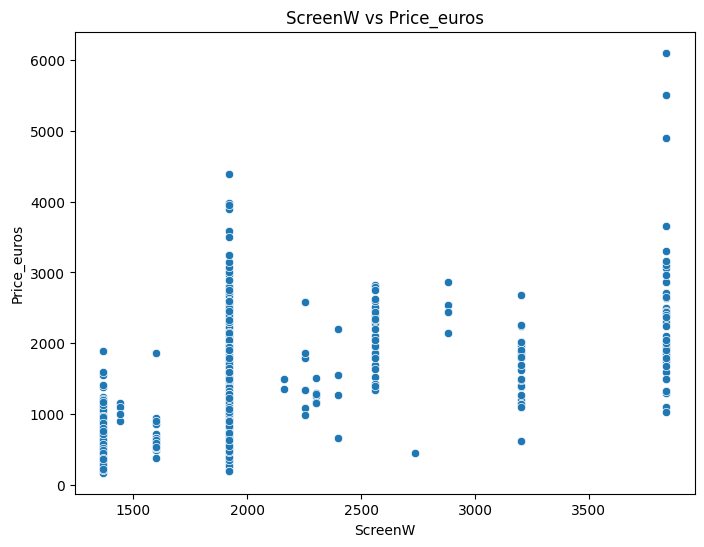

Correlation between ScreenW and Price_euros: 0.5524121801837946


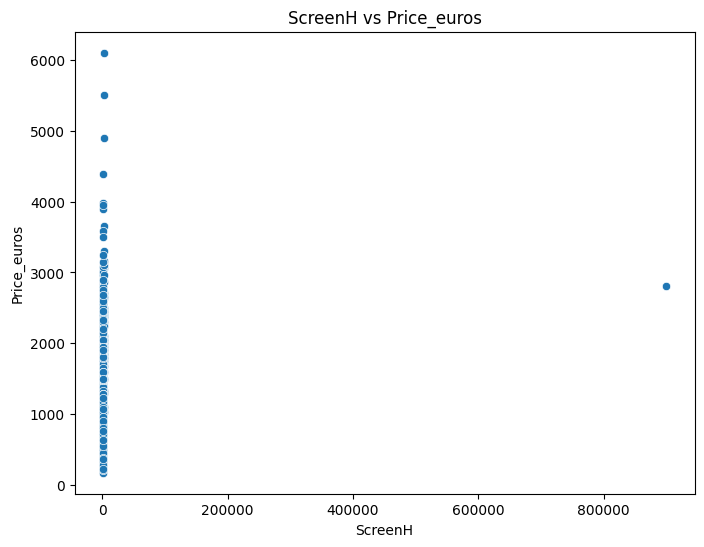

Correlation between ScreenH and Price_euros: 0.07332829925241198


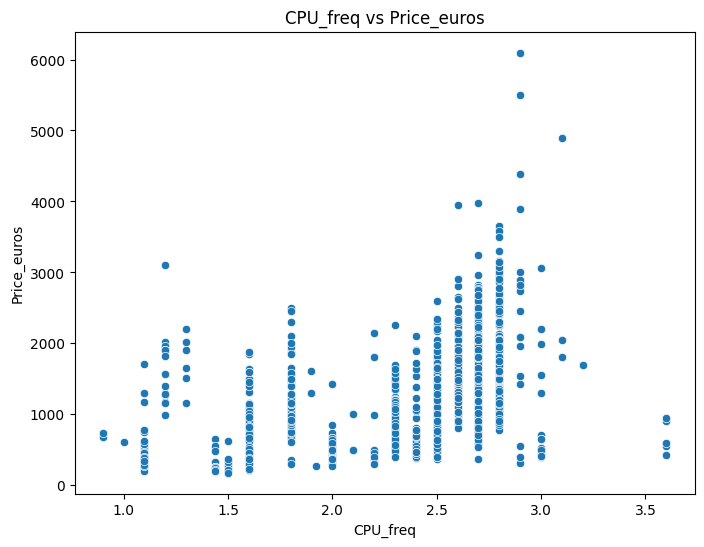

Correlation between CPU_freq and Price_euros: 0.4305188259955189


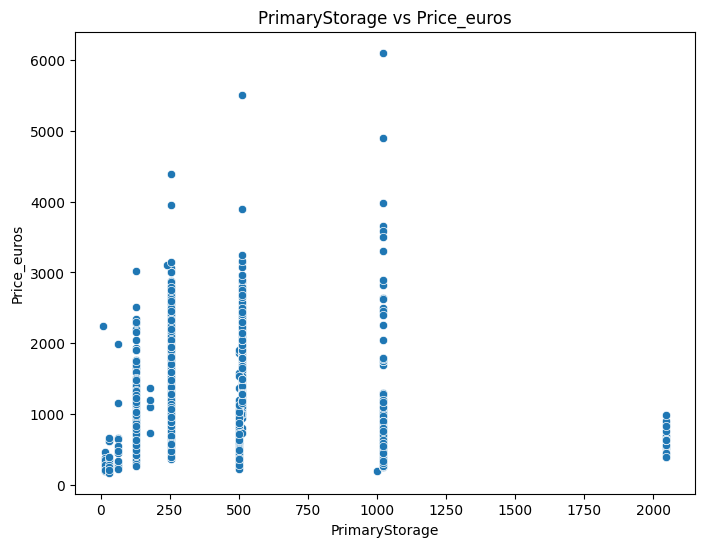

Correlation between PrimaryStorage and Price_euros: -0.12477045352050205


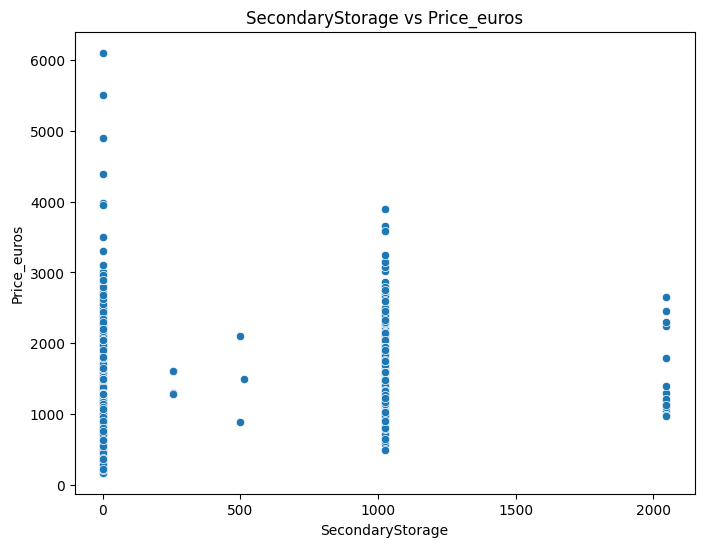

Correlation between SecondaryStorage and Price_euros: 0.29110110186156


In [ ]:
# Plot all of the features one by one compared to price
analyze_all_columns(data, 'Price_euros')

# Simple Linear Regression

In [ ]:
# define the function for residual plot of the model we are creating
def residuals_plot(model):
  ax = subplots(figsize=(8,8))[1]
  ax.scatter(model.fittedvalues, model.resid)
  ax.set_xlabel('Fitted value')
  ax.set_ylabel('Residual')
  ax.axhline(0, c='k', ls='--');

In [ ]:
simple_lr = ols('Price_euros ~ Inches', data = data)   # Create the model
result = simple_lr.fit()   # Fit or train the model
print(result.summary())    # Print the result summary
y_hat = result.predict(data['Inches'])  # y-hat function, which is the prediction from the plot
mse = mean_squared_error(data['Price_euros'], y_hat)    # Compare mean square error of INches vs y-hat of Price_euros
print(f'MSE: {mse}')    # Print Mean Square Error

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.796
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0162
Time:                        17:52:40   Log-Likelihood:                -10121.
No. Observations:                1270   AIC:                         2.025e+04
Df Residuals:                    1268   BIC:                         2.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    639.8732    207.130      3.089      0.0

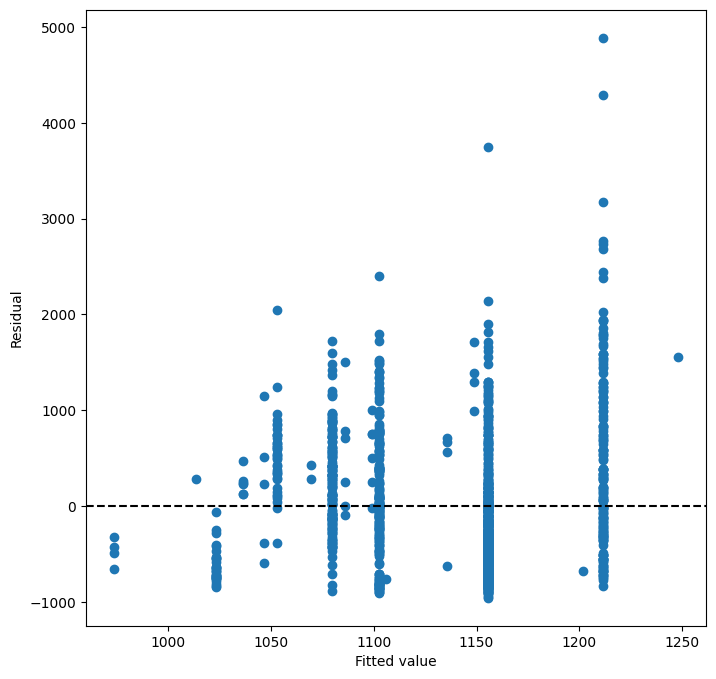

In [ ]:
# residual plot
residuals_plot(result)

In [ ]:
simple_lr = ols('Price_euros ~ CPU_freq', data = data)   # Create the model
result = simple_lr.fit()   # Fit or train the model
print(result.summary())    # Print the result summary
y_hat = result.predict(data['CPU_freq'])  # y-hat function, which is the prediction from the plot
mse = mean_squared_error(data['Price_euros'], y_hat)    # Compare mean square error of CPU_freq vs y-hat of Price_euros
print(f'MSE: {mse}')    # Print Mean Square Error

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     288.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.87e-58
Time:                        17:52:40   Log-Likelihood:                -9994.0
No. Observations:                1270   AIC:                         1.999e+04
Df Residuals:                    1268   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -243.7435     83.172     -2.931      0.0

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1546.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.02e-221
Time:                        17:52:40   Log-Likelihood:                -9618.0
No. Observations:                1270   AIC:                         1.924e+04
Df Residuals:                    1268   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    275.7976     25.569     10.786      0.0

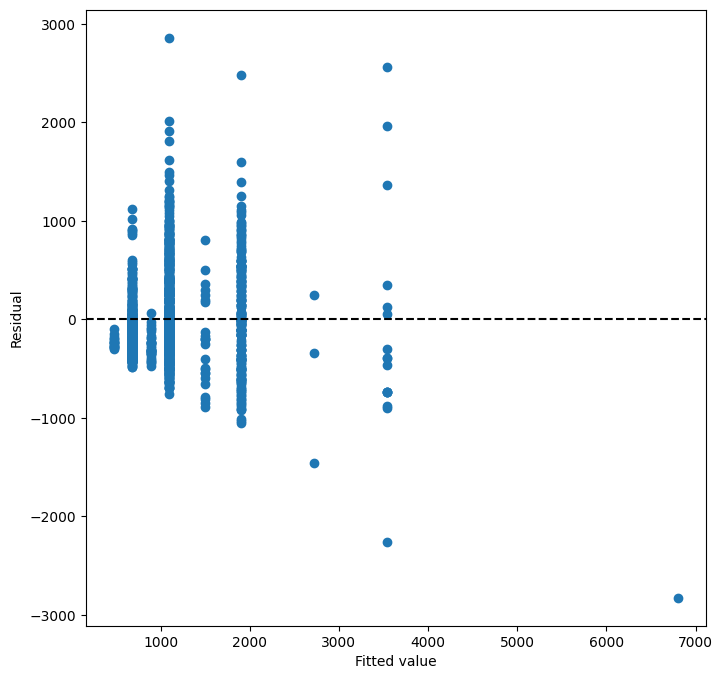

In [ ]:
# Train the model with Ram as the predictor
simple_lr = ols('Price_euros ~ Ram', data = data)
result = simple_lr.fit() # fit the model
print(result.summary()) # print summary of the model
# Predict
y_hat = result.predict(data['Ram']) #y-hat function using Ram as predictor
mse = mean_squared_error(data['Price_euros'], y_hat)    # Compare mean square error of Ram y-hat of Price
# Print the MSE
print(f'MSE: {mse}')
# Plot the residuals
residuals_plot(result)

# Multiple Linear Regression

In [ ]:
# Create, train and fit the model for multiple linear regression
multiple_lr = ols('Price_euros ~ Ram + Inches', data=data).fit()
print(multiple_lr.summary())
y_hat = multiple_lr.predict(data[['Ram', 'Inches']]) # Create the y-hat function (prediction)
mse = mean_squared_error(data['Price_euros'], y_hat)    # Calculate the mean square error of the prediction with Price_euros
print(f'MSE: {mse}')    # Print Mean Square Error

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     814.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.32e-228
Time:                        17:52:40   Log-Likelihood:                -9599.1
No. Observations:                1270   AIC:                         1.920e+04
Df Residuals:                    1267   BIC:                         1.922e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1113.9365    137.866      8.080      0.0

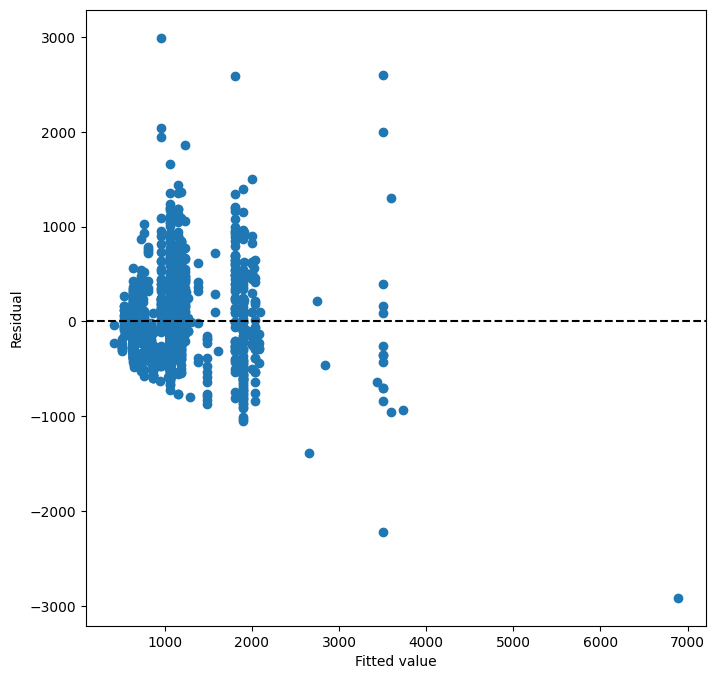

In [ ]:
residuals_plot(multiple_lr) # Print the residuals

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     317.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.45e-296
Time:                        17:52:41   Log-Likelihood:                -9423.5
No. Observations:                1270   AIC:                         1.887e+04
Df Residuals:                    1261   BIC:                         1.891e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -167.0325    152.136  

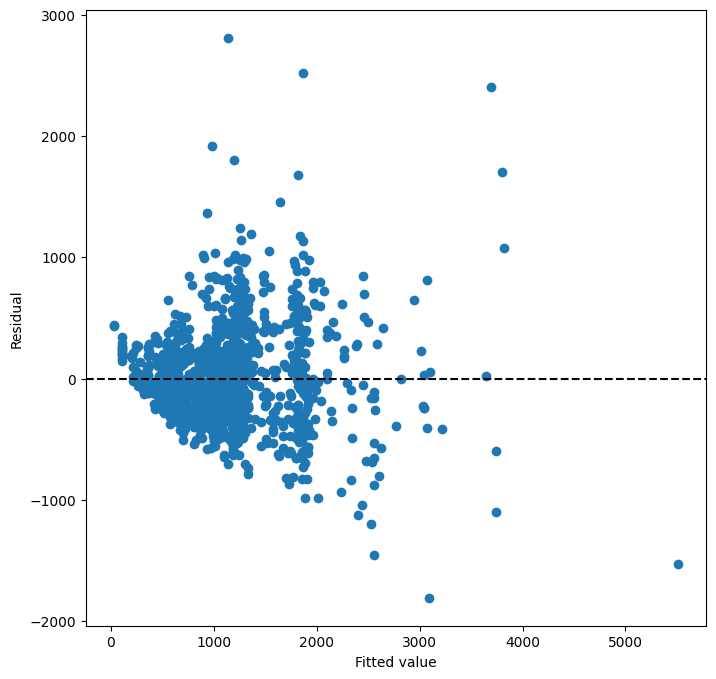

In [ ]:
y = data['Price_euros'] # Define the y value
X = data.drop('Price_euros', axis = 1) # Drop the Price_euros to define the X values with all other features

# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric if necessary
for col in non_numeric_cols:
    try:
        X[col] = pd.to_numeric(X[col])
    except ValueError:
        print(f"Could not convert column {col} to numeric. Please investigate this column.")

X = sm.add_constant(X) # Add a constant to the model
#print(X.head())

all_feature_model = sm.OLS(y, X).fit() # Create and fit the model
print(all_feature_model.summary()) # Print the summary of the model
print(f'MSE: {mean_squared_error(y, all_feature_model.predict(X))}') # Print mean square error with predictors of X
residuals_plot(all_feature_model) # Plot the residuals of the model

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     579.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.27e-237
Time:                        17:52:41   Log-Likelihood:                -9575.3
No. Observations:                1270   AIC:                         1.916e+04
Df Residuals:                    1266   BIC:                         1.918e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -260.7557    123.540     -2.111   

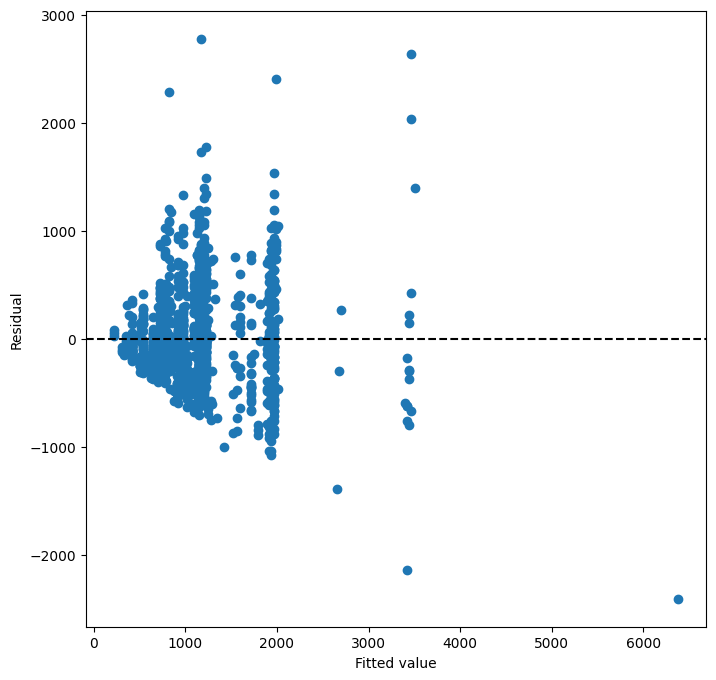

In [ ]:
# Interactions
interactions_lr = ols('Price_euros ~ Ram * CPU_freq', data=data).fit() # Create, train, and fit the model assusming Inches, Ram and ??? are considered together
print(interactions_lr.summary()) # Print the summary of the interactions
residuals_plot(interactions_lr) # Plot the residuals of the model
print(f'MSE: {mean_squared_error(y, interactions_lr.predict(X))}')

# Ridge Regression

In [ ]:
# declare a response value
y = data['Price_euros']
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# the model
linear = LinearRegression().fit(X_train, y_train) # fit the model
y_hat = linear.predict(X_test) # predict the model
print(f"MSE: {mean_squared_error(y_hat, y_test)}") # print mse
print(pd.Series(linear.coef_, index = X.columns)) # ???

MSE: 148729.4418529383
const                 0.000000
Inches              -40.026059
Ram                  78.014058
Weight               -2.489271
ScreenW               0.385276
ScreenH               0.001279
CPU_freq            281.612369
PrimaryStorage       -0.227613
SecondaryStorage     -0.024384
dtype: float64


In [ ]:
ridge = Ridge().fit(X_train, y_train) # fit the ridge model
y_hat = ridge.predict(X_test) # predict the ridge model
mean_square_error = mean_squared_error(y_hat, y_test) # calculate the mean square error
print(f'MSE:{mean_square_error}')
print(pd.Series(ridge.coef_, index = X.columns)) # ???
#print(mean_square_error)

MSE:148742.26832382078
const                 0.000000
Inches              -39.880825
Ram                  78.042195
Weight               -2.486382
ScreenW               0.385422
ScreenH               0.001279
CPU_freq            280.268222
PrimaryStorage       -0.227623
SecondaryStorage     -0.024396
dtype: float64


In [ ]:
alphas = 10**np.linspace(10, -2, 100)* 0.5 # get/create alphas
alphas # print/show the alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge = Ridge() # create ridge model
coef_list = [] # create a coefficient list
for i in alphas:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coef_list.append(ridge.coef_)

np.shape(coef_list) # show the shape of the coefficient list

(100, 9)

Text(0, 0.5, 'coeff')

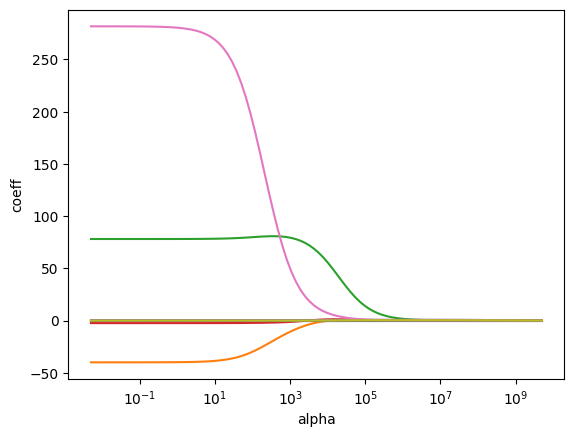

In [ ]:
# plot ridge model
ax = plt.gca()
ax.plot(alphas, coef_list)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coeff')

In [ ]:
ridge_cv = RidgeCV(alphas = alphas) # create model for ridge cross-validation
ridge_cv.fit(X, y) # fit the model
best_alpha = ridge_cv.alpha_ # Best alpha value from the best model
print(best_alpha) # print the best alpha value

5000000000.0


In [ ]:
np.log(12) # logarithmic function???

2.4849066497880004

In [ ]:
ridge = Ridge(alpha = best_alpha).fit(X_train, y_train) # fit ridge model with best alpha value
y_hat = ridge.predict(X_test) # predict the model
mean_square_error = mean_squared_error(y_hat, y_test) # calculate mse
print(f'MSE: {mean_square_error}') # print mse
print(pd.Series(ridge.coef_, index = X.columns)) # ???

MSE: 446542.8501110951
const               0.000000
Inches              0.000015
Ram                 0.000538
Weight              0.000014
ScreenW             0.037113
ScreenH             0.001947
CPU_freq            0.000030
PrimaryStorage     -0.006485
SecondaryStorage    0.016970
dtype: float64


# Lasso Regression

Text(0, 0.5, 'coeff')

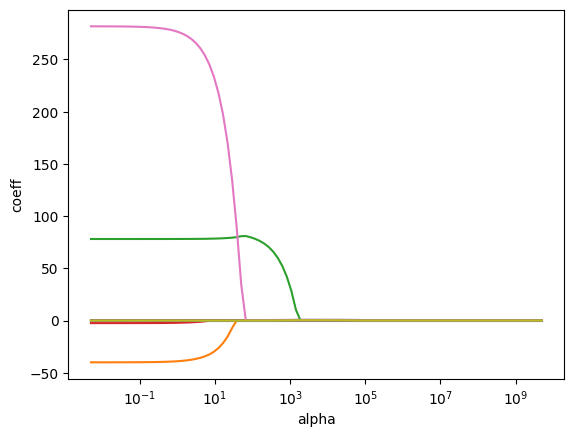

In [ ]:
lasso = Lasso()
coef_list = []
for i in alphas:
    lasso.set_params(alpha = i, max_iter = 10000)
    lasso.fit(X_train, y_train)
    coef_list.append(lasso.coef_)

np.shape(coef_list)

ax = plt.gca()
ax.plot(alphas, coef_list)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coeff')

In [ ]:
lasso_cv = LassoCV(alphas = alphas, max_iter = 10000)
lasso_cv.fit(X, y)
best_alp = lasso_cv.alpha_ # Best alpha value from the best model
print(best_alp) # print the best alpha value

814.8754173103217


In [ ]:
lasso = Lasso(alpha = best_alp).fit(X_train, y_train)
y_hat = lasso.predict(X_test)
mean_square_error = mean_squared_error(y_hat, y_test)
print(f'MSE: {mean_square_error}')
print(pd.Series(lasso.coef_, index = X.columns))


MSE: 214859.0897581228
const                0.000000
Inches               0.000000
Ram                 41.992742
Weight               0.000000
ScreenW              0.582977
ScreenH              0.001322
CPU_freq             0.000000
PrimaryStorage      -0.165429
SecondaryStorage     0.136563
dtype: float64
